# Classificator

In [282]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode

In [283]:
# Loading data set
song_data = pd.read_csv('../data/songs_data.csv')

In [284]:
# Displaying the data, to visualize the how the parameters work 
#song_data.head(n = 5)

### Dataset size

In [285]:
#Displaying number of rows and columns
print("Number of rows: ",song_data.shape[0])
print("Number of columns: ",song_data.shape[1])

Number of rows:  28396
Number of columns:  17


### Information about the dataset

In [286]:
song_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28396 entries, 0 to 28395
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          28396 non-null  object 
 1   track_name        28392 non-null  object 
 2   track_artist      28392 non-null  object 
 3   track_popularity  28396 non-null  int64  
 4   genre             28396 non-null  object 
 5   danceability      28396 non-null  float64
 6   energy            28396 non-null  float64
 7   key               28396 non-null  int64  
 8   loudness          28396 non-null  float64
 9   mode              28396 non-null  int64  
 10  speechiness       28396 non-null  float64
 11  acousticness      28396 non-null  float64
 12  instrumentalness  28396 non-null  float64
 13  liveness          28396 non-null  float64
 14  valence           28396 non-null  float64
 15  tempo             28396 non-null  float64
 16  duration_ms       28396 non-null  int64 

* Each parameter has 28396 data (no data missing), with the only exception in track_name and track_artist (28392) that have 4 data missing. But it does not matter for our purpose

### Describing the dataset

In [287]:
song_data.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000
mean,39.336104,0.653386,0.698387,5.368256,-6.817541,0.565397,0.107990,0.177263,0.091143,0.190986,0.510434,120.955390,226575.367094
std,23.706486,0.145799,0.183484,3.613898,3.036443,0.495714,0.102623,0.222908,0.232566,0.156015,0.234309,26.957635,61076.581384
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,21.000000,0.561000,0.579000,2.000000,-8.309000,0.000000,0.041000,0.014400,0.000000,0.092600,0.329000,99.972000,187766.500000
50%,42.000000,0.670000,0.722000,6.000000,-6.262000,1.000000,0.062700,0.079700,0.000021,0.127000,0.512000,121.993000,216921.000000
75%,58.000000,0.760000,0.843000,9.000000,-4.708750,1.000000,0.133000,0.260000,0.006573,0.249000,0.695000,133.999500,254965.500000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


PARAMETERS:
- Danceability (0-1): 0 ist least danceable and 1 most danceable
- Energy (0-1): 0 less energy, 1 more energy, intensity, activity
- Key (Pitch class notation), c=0, 1=c#Db, 2=D...., 11 keys in total. -1 is No key
- Loudness(dB): average loudness across the entire track. values tipycal [-60 0]
- Mode(major or minor): major =1, minor=0
- Speechiness: detects the presence of spoken words in a track. the more speech = 1, 0.66 <= entirely spoken words, 0.33=> non-speech tracks, in between 
- Acoustieness(0-1): 1 = high confidence the track is acoustic
- Instrumentalness: the closer is to 1, the grater likelihood the track contains no vocal content. 0.5<=are intended to represent instrumental traks.
- Liveness: higher liveness, increased probability that the track was recorded live. 0.8<= strong likelihood that the track is live
- Valence(0-1): tracks with high valance sound more happy 
- Tempo(Beats per minute)
- Duration_ms (miliiseconds)

OBSERVATIONS:
- All the parameters are qualitative type, but put into a scale to describe the attributes. The only data that has units and is quantitative is Loudness (dB), Tempo (BPM) and duration_ms (ms)
- Loudness of our data [-46.448, 1.27], and typical values goes from [-60 0]. So the audio that is bigger than 0 or is an outliner o was "clipped" because in digital audio this is not possible. Either way, we have to normalize this parameter or threat them as ourlitners and dismiss them, or just convert it to 0dB
- It was decided that "liveness", "mode" and "duration_ms" is not a parameter we should use, it is not related with genre
- All the songs has key, in other words, there is no "-1" in the key column

### Table of average parameters for each genre

In [288]:
subss = song_data.drop(['track_id','track_name','track_artist','track_popularity','liveness','mode','duration_ms'], axis = 1)  #dataframe with just numerical values and genre
EDM = subss[subss["genre"] == "edm"]
ROCK = subss[subss["genre"] == "rock"]
RAP = subss[subss["genre"] == "rap"]
LATIN = subss[subss["genre"] == "latin"]
RNB = subss[subss["genre"] == "r&b"]
POP = subss[subss["genre"] == "pop"]

mean_summary = pd.DataFrame({
    'EDM': EDM.describe().loc['mean'],
    'ROCK': ROCK.describe().loc['mean'],
    'RAP': RAP.describe().loc['mean'],
    'LATIN': LATIN.describe().loc['mean'],
    'RNB': RNB.describe().loc['mean'],
    'POP': POP.describe().loc['mean']
})
mean_summary

,EDM,ROCK,RAP,LATIN,RNB,POP
danceability,0.657675,0.518599,0.716019,0.711032,0.667465,0.637648
energy,0.809599,0.732942,0.649966,0.710556,0.589056,0.700940
key,5.355064,5.254174,5.431449,5.469580,5.381238,5.316936
loudness,-5.487558,-7.562313,-7.087460,-6.480431,-8.031843,-6.377415
speechiness,0.087976,0.057947,0.197466,0.100411,0.115639,0.074171
acousticness,0.077026,0.147625,0.196493,0.212494,0.264144,0.172402
instrumentalness,0.244743,0.066583,0.080089,0.052556,0.028499,0.063680
valence,0.397494,0.532581,0.505351,0.607292,0.537971,0.502188
tempo,126.328434,125.060102,120.549530,118.527269,113.929145,120.960428


In [289]:
print("Highest danceability: ",mean_summary.loc['danceability'].idxmax(), ' with ', round(mean_summary.loc['danceability'].max(),5))
print("Lowest danceability: ",mean_summary.loc['danceability'].idxmin(), ' with ', round(mean_summary.loc['danceability'].min(),5))
print('\n')
print("Highest energy: ",mean_summary.loc['energy'].idxmax(), ' with ', round(mean_summary.loc['energy'].max(),5))
print("Lowest energy: ",mean_summary.loc['energy'].idxmin(), ' with ', round(mean_summary.loc['energy'].min(),5))
print('\n')
print("Highest key : ",mean_summary.loc['key'].idxmax(), ' with ', round(mean_summary.loc['key'].max(),5))
print("Lowest key : ",mean_summary.loc['key'].idxmin(), ' with ', round(mean_summary.loc['key'].min(),5))
print('\n')
print("Highest loudness : ",mean_summary.loc['loudness'].idxmax(), ' with ', round(mean_summary.loc['loudness'].max(),5))
print("Lowest loudness : ",mean_summary.loc['loudness'].idxmin(), ' with ', round(mean_summary.loc['loudness'].min(),5))
print('\n')
print("Highest speechiness : ",mean_summary.loc['speechiness'].idxmax(), ' with ', round(mean_summary.loc['speechiness'].max(),5))
print("Lowest speechiness : ",mean_summary.loc['speechiness'].idxmin(), ' with ', round(mean_summary.loc['speechiness'].min(),5))
print('\n')
print("Highest acousticness : ",mean_summary.loc['acousticness'].idxmax(), ' with ', round(mean_summary.loc['acousticness'].max(),5))
print("Lowest acousticness : ",mean_summary.loc['acousticness'].idxmin(), ' with ', round(mean_summary.loc['acousticness'].min(),5))
print('\n')
print("Highest instrumentalness: ",mean_summary.loc['danceability'].idxmax(), ' with ', round(mean_summary.loc['instrumentalness'].max(),5))
print("Lowest instrumentalness: ",mean_summary.loc['instrumentalness'].idxmin(), ' with ', round(mean_summary.loc['instrumentalness'].min(),5))
print('\n')
print("Highest valence: ",mean_summary.loc['valence'].idxmax(), ' with ', round(mean_summary.loc['valence'].max(),5))
print("Lowest valence: ",mean_summary.loc['valence'].idxmin(), ' with ', round(mean_summary.loc['valence'].min(),5))
print('\n')
print("Highest tempo: ",mean_summary.loc['tempo'].idxmax(), ' with ', round(mean_summary.loc['tempo'].max(),5))
print("Lowest tempo: ",mean_summary.loc['tempo'].idxmin(), ' with ', round(mean_summary.loc['tempo'].min(),5))

Highest danceability:  RAP  with  0.71602
Lowest danceability:  ROCK  with  0.5186


Highest energy:  EDM  with  0.8096
Lowest energy:  RNB  with  0.58906


Highest key :  LATIN  with  5.46958
Lowest key :  ROCK  with  5.25417


Highest loudness :  EDM  with  -5.48756
Lowest loudness :  RNB  with  -8.03184


Highest speechiness :  RAP  with  0.19747
Lowest speechiness :  ROCK  with  0.05795


Highest acousticness :  RNB  with  0.26414
Lowest acousticness :  EDM  with  0.07703


Highest instrumentalness:  RAP  with  0.24474
Lowest instrumentalness:  RNB  with  0.0285


Highest valence:  LATIN  with  0.60729
Lowest valence:  EDM  with  0.39749


Highest tempo:  EDM  with  126.32843
Lowest tempo:  RNB  with  113.92915


### Distribution graphs per parameter vs genre

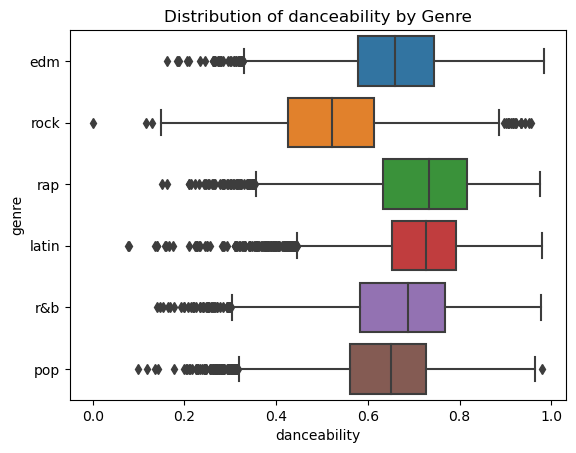

In [290]:
sns.boxplot(x='danceability', y='genre', data=song_data)
plt.title('Distribution of danceability by Genre')
plt.show()

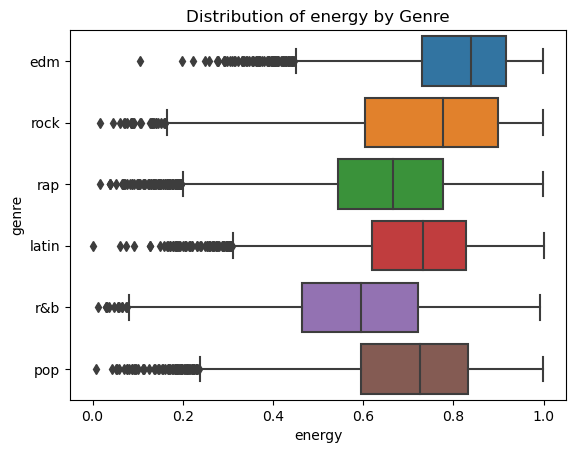

In [291]:
sns.boxplot(x='energy', y='genre', data=song_data)
plt.title('Distribution of energy by Genre')
plt.show()

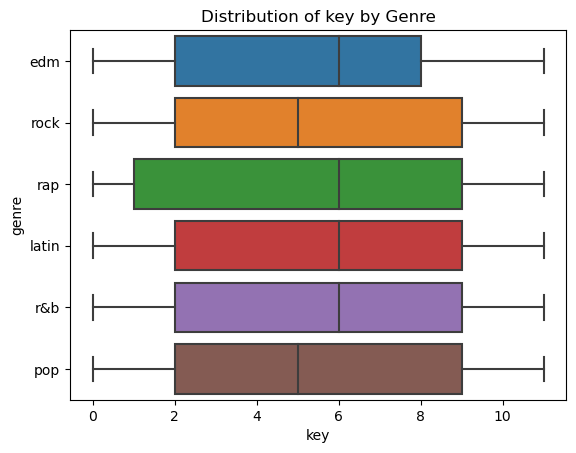

In [292]:
sns.boxplot(x='key', y='genre', data=song_data)
plt.title('Distribution of key by Genre')
plt.show()

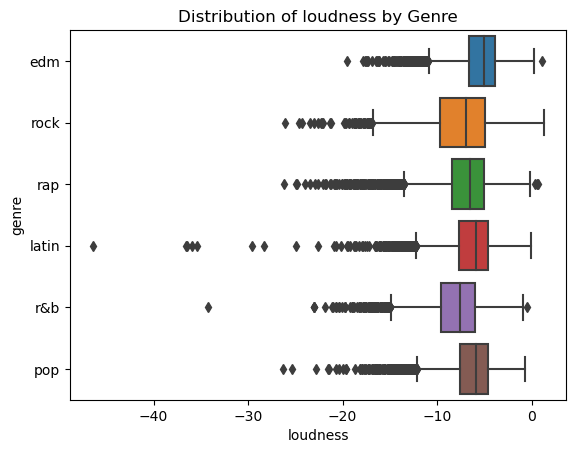

In [293]:
sns.boxplot(x='loudness', y='genre', data=song_data)
plt.title('Distribution of loudness by Genre')
plt.show()

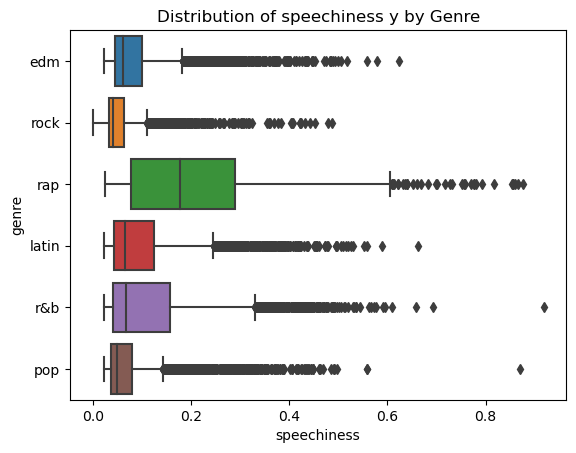

In [294]:
sns.boxplot(x='speechiness', y='genre', data=song_data)
plt.title('Distribution of speechiness y by Genre')
plt.show()

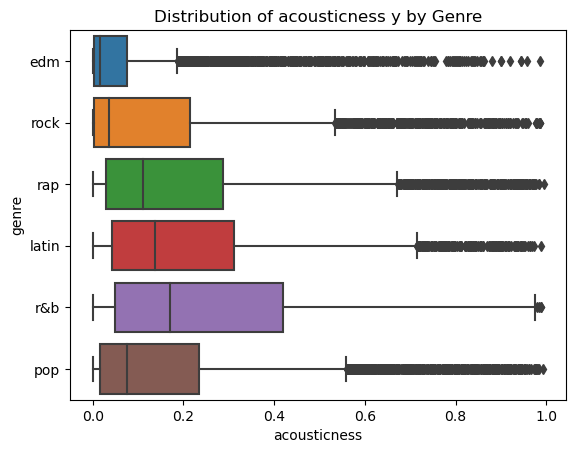

In [295]:
sns.boxplot(x='acousticness', y='genre', data=song_data)
plt.title('Distribution of acousticness y by Genre')
plt.show()

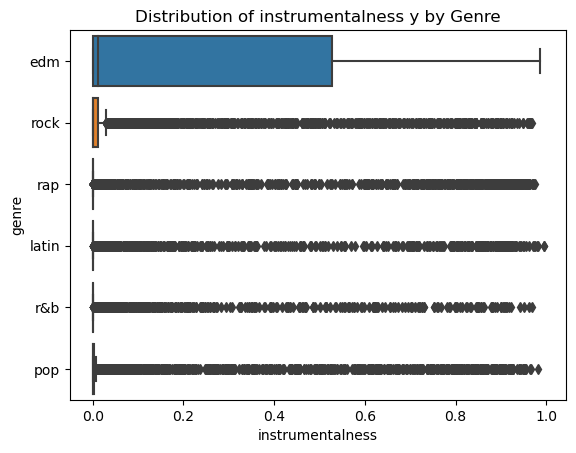

In [296]:
sns.boxplot(x='instrumentalness', y='genre', data=song_data)
plt.title('Distribution of instrumentalness y by Genre')
plt.show()

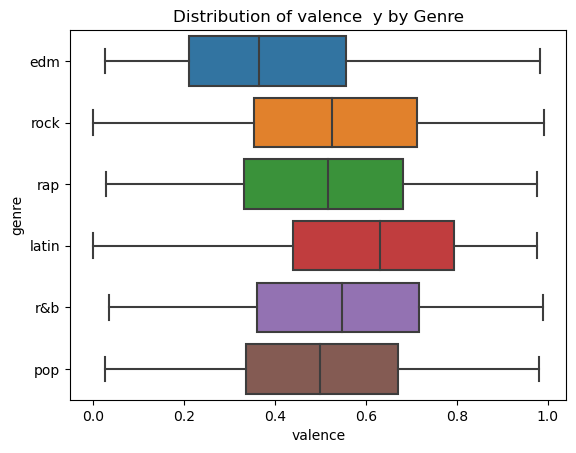

In [297]:
sns.boxplot(x='valence', y='genre', data=song_data)
plt.title('Distribution of valence  y by Genre')
plt.show()

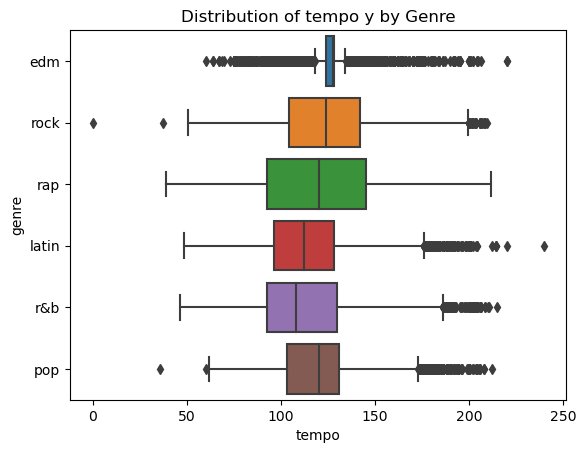

In [298]:
sns.boxplot(x='tempo', y='genre', data=song_data)
plt.title('Distribution of tempo y by Genre')
plt.show()

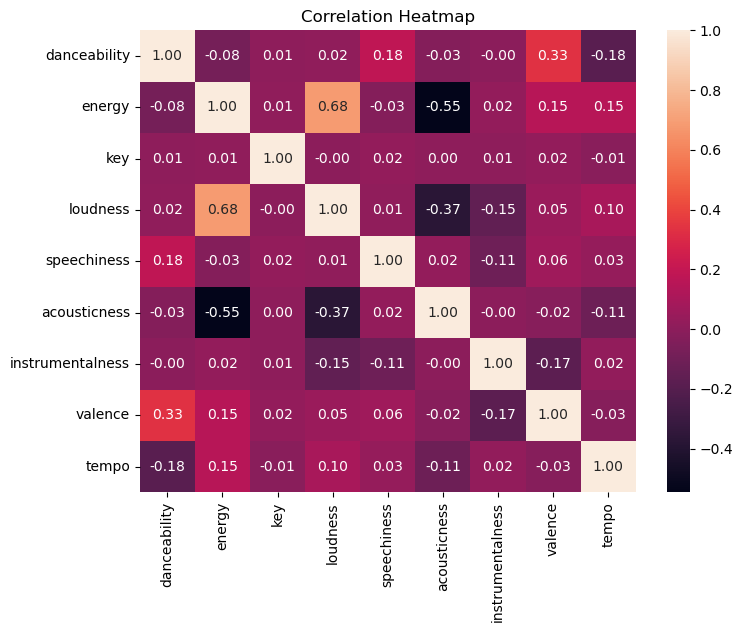

In [299]:
# Correrlation matrix
# First, drop the parameters that are not numerical
X =subss.drop('genre', axis = 1)
#corr_matrix = X.corr()
correlation_matrix = X.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Conclusion for next steps 

- Valance and danceability are related (the more happy is the song, the more danceability)
- The more energy, less chance to be an acoustic song
- strong relation with energy and loudness, therefore there is also a relation with loudness and acousticness
- Danceability is considered important to find rock songs due its low value
- Energy is important to find edm songs (highest value) and rnb songs (lowest value)
- Key, most of the genre share similar keys, so maybe we could analyze more its importance. rock and pop avr. have lower keys
- Loudness can be useful to find edm and rnb songs
- speechiness is important to find rap songs, and rnb songs
- acousticnes is important for rnb songs and edm songs
- instrummentalness can be important for edm music
- Valence is important for latin and edm
- tempo, it is importan for edm, and also rap/rnb maybe

**Deal with outliners and check the case of Loudness for cleaning**